![](https://a0.muscache.com/im/pictures/b2ef8095-a2d7-4ef0-b757-55f42e012259.jpg?im_w=1680)

# Table of Contents
- [1. Introduction](#Introduction)
    - [1.1 Business Understanding](#business-understanding)
- [2. Exploratory Data Analysis and Data Modeling](#eda)
    - [2.1 Data Understanding](#data-understanding)        
    - [2.2 Data Preparation](#data-preparation)  
        - [2.2.1 Data Wrangling](#data-wrangling)
        - [2.2.2 Missing Value Imputation](#fill-na)
    - [2.3 Q1: Is choosing an Airbnb unit hosted by a superhost worth It?](#q1)  
        - [2.3.1 Two Sample Independent T-Test](#q1-test)
        - [2.3.2 Result Evaluation of Q1](#q1-result)
    - [2.4 Q2: What are the key factors to consider for maximizing property performance?](#q2)
        - [2.4.1 Data Modeling](#q2-model)
        - [2.4.2 Result Evaluation of Q2](#q2-result)
    - [2.5 Q3: How has Airbnb developed in Seattle, and are there any observable trends or patterns?](#q3)
        - [2.5.1 Time Series Data Wrangling and Visualization](#q3-prepare)
        - [2.5.2 Result Evaluation of Q3](#q3-result)
- [3. Conclusions](#conconclusions)


# 1. Introduction
In this notebook I will analyze the [Seattle Airbnb dataset](https://www.kaggle.com/datasets/airbnb/seattle) from Kaggle. It will follow and CRoss Industry Standard Process for Data Mining (CRISP-DM) which is consisted of the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment

# 1.1 Business Understanding
<a id="business-understanding"></a>

Airbnb is a platform that allows house and apartment owners to rent their properties to guests for short-term stays. Due to its convenience and flexibility, it has become one of the top choices for travelers. In this post, I will be analyzing the Airbnb Seattle dataset and answering three business questions outlined below.

The dataset is a collection of property listings and their key attributes such as the size of the properties, availability of amenities, description of the neighborhood, customers' reviews, and more.

Q1. [As a traveler, is choosing an Airbnb unit hosted by a superhost worth It?](#q1)

Q2. [As a investor, what are the key factors to consider for maximizing Airbnb unit performance?](#q2)

Q3. [How has Airbnb developed in Seattle, and are there any observable trends or patterns?](#q3)

<a id="eda"></a>
# 2.Exploratory Data Analysis and Data Modeling


<a id="data-understanding"></a>
# 2.1 Data Understanding


In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
import statsmodels.stats.multitest as multi

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [43]:
# df_calendar = pd.read_csv("/kaggle/input/seattle/calendar.csv")
# df_listings = pd.read_csv("/kaggle/input/seattle/listings.csv")
# df_reviews = pd.read_csv("/kaggle/input/seattle/reviews.csv")

df_calendar = pd.read_csv("./data/small_data_100MB/seattle/archive/calendar.csv")
df_listings = pd.read_csv("./data/small_data_100MB/seattle/archive/listings.csv")
df_reviews = pd.read_csv("./data/small_data_100MB/seattle/archive/reviews.csv")

for data in [df_calendar,df_listings,df_reviews]:
    display(data.head())
    print(data.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,...,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,...,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/a

(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


After reviewing the [official data assumption document](http://insideairbnb.com/data-assumptions/), I gained a better understanding of the dataset and identified the features I will use to answer the business questions.

The **calendar** data records the price and availability of each property listing for the next 365 days. Since it reflects each host's future housing plans, I won't be using this data in my analysis.

The **listings** data primarily describes the attributes of each property listing. I found that the feature "_host_is_superhost_" is the indicator of a superhost, which will help me answer Q1.

The **reviews** dataset contains reviews left by customers. For each review, I can find the date and the corresponding listing property. Using this timeline data, I can answer Q3, which involves examining the development of Airbnb over the years.

To answer Q2, I looked for features related to popularity or occupancy rates. According to the  [official data assumption document](http://insideairbnb.com/data-assumptions/), "a Review Rate of 50% is used to convert reviews to estimated bookings." Therefore, I will convert _reviews_per_month_ to the number of bookings as a proxy metric for the success of an Airbnb unit.




In [44]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<a id="data-preparation"></a>
# 2.2 Data Preparation


<a id="data-wrangling"></a>
# 2.2.1 Data Wrangling

In [10]:
# Retrieve the creation date of the dataframe for feature engineering
df_listing_last_scraped = pd.Timestamp(df_listings.last_scraped[0])

# Drop duplicate columns
df_listings = df_listings.T.drop_duplicates().T

# Drop columns with full NA
df_listings.dropna(axis=1,how="all",inplace=True)

# Drop columns with only one unique value
df_listings.drop([c for c in df_listings.columns if df_listings[c].nunique()==1],axis=1,inplace=True)

# Drop columns representing url
df_listings.drop(df_listings.columns[df_listings.columns.str.contains("url")],axis=1,inplace=True)

# Reformat the money related columns
df_listings.price = df_listings.price.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings.weekly_price = df_listings.weekly_price.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings.monthly_price = df_listings.monthly_price.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings.security_deposit = df_listings.security_deposit.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings.extra_people = df_listings.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

# Retrieve the creation date of the dataframe for feature engineering
df_listing_last_scraped = pd.Timestamp(df_listings.last_scraped[0])

# Transform the date related columns
df_listings['host_since_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.host_since)).dt.days
df_listings['last_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.last_review)).dt.days
df_listings['first_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.first_review)).dt.days

# Reformat other features
df_listings['host_response_time'] = df_listings.host_response_time.map({"within an hour":1,"within a few hours":12,\
                                                                        "within a day":24,"a few days or more":48})
df_listings.host_response_rate = df_listings.host_response_rate.str.replace("%","").astype("float32")
df_listings['cancellation_policy'] = df_listings['cancellation_policy'].map({'strict':0,'moderate':1,'flexible':2})



In [13]:
# Create a feature count the number of host verification methods
df_listings['host_verifications'] = df_listings['host_verifications'].astype(str)  # Ensure all values are strings
host_verifications = np.unique(np.concatenate(df_listings.host_verifications.map(lambda x: x[1:-1].replace("'", "").split(", "))))[1:]
matrix_verifications = [[veri in row for row in df_listings.host_verifications.map(lambda x: x[1:-1].replace("'", "").split(", "))] for veri in host_verifications]
df_listings['host_verificationCount'] = pd.DataFrame(matrix_verifications, index=host_verifications).T.sum(1)

I check the features one by one and finally select 3 types of features relevant to our questions. They are features respectively related to Airbnb host, Airbnb property and traveler.

In [14]:

features_host = ['host_is_superhost','host_about','host_response_time','host_response_rate', 'host_listings_count',
                 'host_verificationCount','host_has_profile_pic','host_identity_verified','host_since_deltaDays',\
                 'calculated_host_listings_count']

features_property = ['summary','space','description','neighborhood_overview','notes','transit',
                     'street','neighbourhood','zipcode','latitude','longitude','is_location_exact',
                     'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type',
                     'amenities','square_feet','price','weekly_price','security_deposit','cleaning_fee',
                     'guests_included','extra_people','minimum_nights','maximum_nights']

features_traveler = ['number_of_reviews','last_review_deltaDays','first_review_deltaDays','review_scores_rating',
                     'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                     'review_scores_location','review_scores_value','instant_bookable','cancellation_policy',\
                     'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']

features = features_host + features_property + features_traveler
df_listings_filtered = df_listings[features]

In [15]:
numeric_feature = ['host_listings_count','calculated_host_listings_count','latitude','longitude','accommodates','bathrooms',\
                   'bedrooms','beds','guests_included','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',\
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',\
                   'review_scores_location','review_scores_value', 'review_scores_rating' ,'review_scores_accuracy',\
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',\
                   'review_scores_value' ,'reviews_per_month'] 

bool_feature = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable',\
                'require_guest_phone_verification','require_guest_profile_picture']

# Transform the bool features
for bool_f in bool_feature:
  df_listings_filtered[bool_f] = df_listings_filtered[bool_f].map({'t':1,'f':0}).astype('bool')

# Transform the numerical features
for num_f in numeric_feature:
    df_listings_filtered[num_f] = df_listings_filtered[num_f].astype("float32")

In [16]:
# Fix the weird zipcode value
df_listings_filtered.zipcode[df_listings_filtered.zipcode=="99\n98122"] = 98122
# Drop column square_feet for containing too many NA values (97.5%)
df_listings_filtered.square_feet.isna().mean()
df_listings_filtered.drop("square_feet",axis=1,inplace=True)

In [17]:
# Transform the amenities feature into a one-hot encoding matrix
unqiue_amenities = np.unique(np.concatenate(df_listings_filtered.amenities.str[1:-1].str.replace('"','')\
                                            .str.split(",")))[1:]
matrix_amenities=[[amen in row for row in df_listings_filtered.amenities.str[1:-1].str.replace('"','').\
                   str.split(",") ] for amen in unqiue_amenities]
df_amenities = pd.DataFrame(matrix_amenities,index=unqiue_amenities).T

# Drop amenities features appaer in less than 5% of samples to avoid overfitting
df_amenities.drop(df_amenities.columns.values[np.where(df_amenities.mean()<0.05)],axis=1,inplace=True)
df_listings_filtered_amenities = pd.concat([df_listings_filtered,df_amenities],axis=1)

<a id="fill-na"></a>
# 2.2.2 Missing Value Imputation


In [18]:
print(df_listings_filtered_amenities.isna().mean().sort_values(ascending=False).head(35))

security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
review_scores_checkin          0.172342
review_scores_accuracy         0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
first_review_deltaDays         0.164222
last_review_deltaDays          0.164222
reviews_per_month              0.164222
space                          0.149031
host_response_time             0.136983
host_response_rate             0.136983
neighbourhood                  0.108958
summary                        0.046359
bathrooms                      0.004191
zipcode                        0.001833
bedrooms                       0.001572


The review related columns exhibit a similar missing value ratio of around 17%, suggesting that these missing values are primarily from properties with zero reviews. However, it is important to decide whether to include these properties in our analysis. Properties with zero reviews could have various reasons for not having any reviews. It could be due to the properties being inherently unattractive, the owner listing the properties for other purposes, or the host being new to the platform with a relatively short time on the market.

To assess the impact of including these properties, we examined the distribution of years that properties with zero reviews have been listed on Airbnb, which shows that 42% of these properties were listed for less than a year. To reduce uncertainty in the model, we have decided to remove these "outliers" from further analysis.

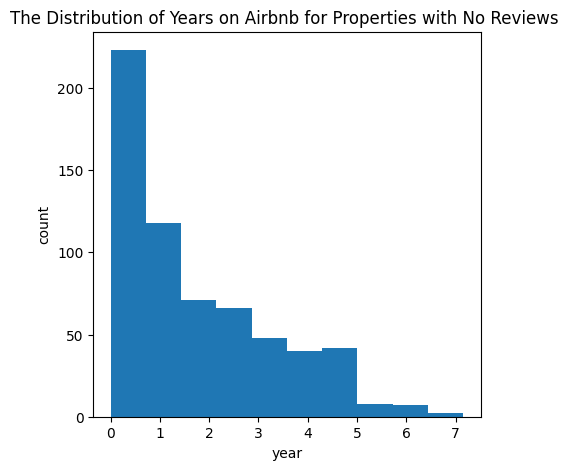

In [19]:
f, axs = plt.subplots(1,1,figsize=(5,5))
(df_listings_filtered_amenities.query("number_of_reviews==0").host_since_deltaDays/365).plot(kind="hist")
ax = plt.gca()
ax.set_title("The Distribution of Years on Airbnb for Properties with No Reviews ")
ax.set_xlabel("year");
ax.set_ylabel("count");
f.show()

In [20]:
# Drop samples with zero reviews
# We see that the majority of missing values gone with these properties
df_listings_filtered_amenities = df_listings_filtered_amenities.query('number_of_reviews>0')
print(df_listings_filtered_amenities.isna().mean().sort_values(ascending=False).head(35))


security_deposit               0.493576
weekly_price                   0.435914
notes                          0.376371
cleaning_fee                   0.240677
neighborhood_overview          0.233783
transit                        0.204951
host_about                     0.182701
space                          0.104356
host_response_time             0.100282
host_response_rate             0.100282
neighbourhood                  0.096835
summary                        0.052648
review_scores_accuracy         0.009715
review_scores_checkin          0.009715
review_scores_value            0.009088
review_scores_location         0.008775
review_scores_cleanliness      0.008148
review_scores_communication    0.007521
review_scores_rating           0.006268
bathrooms                      0.003761
zipcode                        0.001880
bedrooms                       0.001880
Fire Extinguisher              0.000000
Cable TV                       0.000000
Carbon Monoxide Detector       0.000000


To handle missing data in our dataset, I adopted two different strategies based on the data type of each feature. For numerical features, such as prices or ratings, I replaced missing values with the median value of the available data. This approach is robust to the presence of outliers and avoids distorting the distribution of the variable. On the other hand, for categorical features, such as property type or neighborhood, I imputed the missing values with the most frequent category, which is also known as the mode. This method preserves the distribution of the variable and is suitable for nominal or ordinal data. By applying these techniques, we ensure that our dataset is complete and ready for further analysis.

In [21]:
df_listings_filtered_amenities_cleaned = df_listings_filtered_amenities.copy()

# Fill NA for numeric features
df_listings_filtered_amenities_cleaned.zipcode = df_listings_filtered_amenities_cleaned.zipcode.fillna(
                                                df_listings_filtered_amenities_cleaned.zipcode.mode()[0])
feature_fillna_median = ['host_response_time','host_response_rate','security_deposit','cleaning_fee','weekly_price','bedrooms',
                         'bathrooms','review_scores_rating','review_scores_communication','review_scores_cleanliness','review_scores_location',
                         'review_scores_value','review_scores_accuracy','review_scores_checkin']
df_listings_filtered_amenities_cleaned[feature_fillna_median] = df_listings_filtered_amenities_cleaned[feature_fillna_median].fillna(
                                                                df_listings_filtered_amenities_cleaned[feature_fillna_median].median())

# Fill NA for object features
feature_fillna_empty =  ['summary','neighbourhood','space','host_about','transit','neighborhood_overview','notes']
df_listings_filtered_amenities_cleaned[feature_fillna_empty] = df_listings_filtered_amenities_cleaned[feature_fillna_empty].fillna('')

# Numerical features
df_num = df_listings_filtered_amenities_cleaned.select_dtypes(exclude='object')
# One hot encoding categorical features
df_cat = pd.get_dummies(df_listings_filtered_amenities_cleaned.select_dtypes(include='object')[['property_type','room_type', 'bed_type']])
# Drop one hot categorical feature columns appearing less then 5% of samples
catFeatureToDrop = df_cat.columns.where(df_cat.mean()<0.05).dropna()
df_cat.drop(catFeatureToDrop,axis=1,inplace=True)
df_cat = df_cat.astype("bool")
df_total = pd.concat([df_num,df_cat],axis=1)

<a id="q1"></a>
# 2.3 Q1: Is choosing an Airbnb unit hosted by a superhost worth It?

In this section, I will investigate the differences between superhosts and other hosts on various features. To achieve this, I will perform two-sample independent t-tests to identify features where the mean values differ significantly between these two groups.

<a id="q1-test"></a>
# 2.3.1 Two Sample Independent T-Test

In [22]:
# Helper function for two independent sample t-test
def ttest(df,group_feature, test_feature):
    flag0 = df[group_feature]==False
    flag1 = ~flag0
    vector_0 = df.loc[flag0,test_feature]
    vector_1 = df.loc[flag1,test_feature]
    statistic, pvalue = stats.ttest_ind(vector_1, vector_0)
    return [statistic,pvalue,test_feature]    

In [23]:
# T-test
ttest_result = []
for col in df_total.columns:
    if col=="host_is_superhost":
        continue
    else:
        ttest_result.append(ttest(df_total,"host_is_superhost",col))

# Display the t-test result
ttest_result = pd.DataFrame(ttest_result,columns=['statistics','pvalue','feature'])
# P-value adjustment
multitest_result = multi.multipletests(ttest_result.pvalue,method="bonferroni")
ttest_result['significant'],ttest_result['adjust_pvalue']=multitest_result[0],multitest_result[1]
ttest_result.sort_values(['significant','adjust_pvalue'],ascending=[False,True]).style.bar(subset=['statistics'], 
                                                                     align='zero', color=['#d65f5f', '#5fba7d'])

,statistics,pvalue,feature,significant,adjust_pvalue
37,15.911607,0.000000,reviews_per_month,True,0.000000
26,13.952008,0.000000,review_scores_rating,True,0.000000
23,13.477553,0.000000,number_of_reviews,True,0.000000
28,13.172330,0.000000,review_scores_cleanliness,True,0.000000
32,12.538164,0.000000,review_scores_value,True,0.000000
27,12.240080,0.000000,review_scores_accuracy,True,0.000000
29,9.388841,0.000000,review_scores_checkin,True,0.000000
30,9.174692,0.000000,review_scores_communication,True,0.000000
66,8.128337,0.000000,Shampoo,True,0.000000
1,7.705804,0.000000,host_response_rate,True,0.000000


<a id="q1-result"></a>
# 2.3.2 Result Evaluation of Q1


In [24]:
# About 43% of the significant features are amenities.
ttest_result.feature[ttest_result.significant==True].isin(unqiue_amenities).sum()/np.sum(ttest_result.significant==True)

0.42857142857142855

Let's take a few significant features and visualize the comparison.

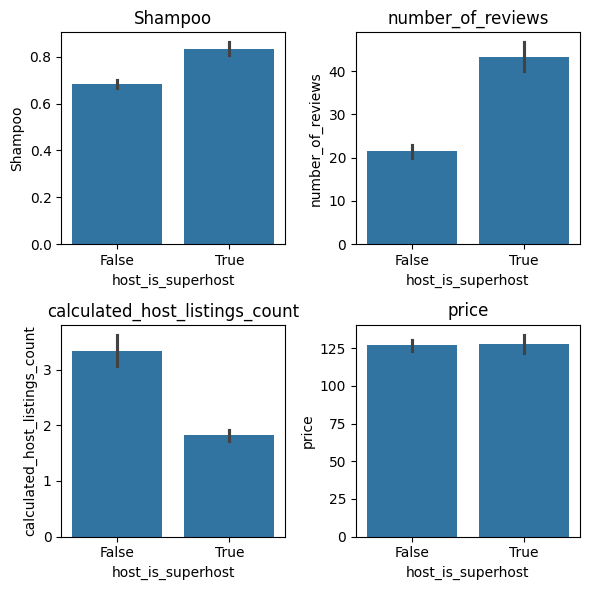

In [25]:
matplotlib.rcParams['figure.figsize'] = (6,6)
plt.subplot(221)
sns.barplot(data=df_total,y="Shampoo",x="host_is_superhost")
plt.title("Shampoo")
plt.subplot(222)
sns.barplot(data=df_total,y="number_of_reviews",x="host_is_superhost")
plt.title("number_of_reviews")
plt.subplot(223)
sns.barplot(data=df_total,y="calculated_host_listings_count",x="host_is_superhost")
plt.title("calculated_host_listings_count")
plt.subplot(224)
sns.barplot(data=df_total,y="price",x="host_is_superhost")
plt.title("price")
plt.tight_layout()


It is not surprising to see that super hosts receive more reviews and higher ratings compared to other hosts. This can be attributed to their quick response rate and their focus on safety, which includes verifying travelers and themselves on multiple platforms.

When analyzing the features that significantly distinguish super hosts from other hosts, it was found that almost half of these features were amenities. Interestingly, the most impactful feature was _Shampoo_, while _Kitchen_ barely crossed the significance threshold. This is understandable as travelers usually have limited time for cooking and prioritize taking a good shower and getting a good night's sleep during their short-term stays.

Despite the superiority of super hosts' properties, it might be assumed that they charge premium prices. However, statistically, this is not the case. One interesting feature is _calculated_host_listings_count_, which indicates the number of properties owned by the host. It appears that companies and owners who own multiple properties cannot pay enough attention to each property, while super hosts typically own only 1 or 2 properties.

Therefore, the answer to Q1 is yes! As a traveler, you should prioritize booking Airbnb units hosted by super hosts. This will allow you to enjoy better living conditions without worrying about being overcharged. However, as super hosts' properties are more popular, you should definitely consider booking ahead.

<a id="q2"></a>
# 2.4 Q2: What are the key factors to consider for maximizing property performance?

To evaluate the success of an Airbnb unit, it's important to choose an appropriate metric. While "reviews_per_month" might be the first metric that comes to mind, it's possible that a property could receive many reviews but they may not be positive. To address this, I decided to use the product of "<i>review_scores_rating</i>" and "<i>reviews_per_month</i>" as the metric, which provides a more comprehensive view of the property's overall satisfaction level and popularity.

To avoid redundancy, it's important to remove any review and rating related features in the dataset, as they are already accounted for in the metric I created. Additionally, I also drop features related to the host, as the question specifically asks about the attributes of a property that an investor should consider. By focusing on the key property-related factors, an investor can make a more informed decision on which Airbnb units to invest in.

<a id="q2-model"></a>
# 2.4.1 Data Modeling


In [26]:
# Create the metric and named it "performance"
df_total['performance'] = df_total.reviews_per_month * df_num.review_scores_rating
# Draw host and review related features
featureToDrop = [f for f in df_total.columns.values if "review" in f or 'host' in f]
featureToDrop

['host_is_superhost',
 'host_response_time',
 'host_response_rate',
 'host_listings_count',
 'host_verificationCount',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_since_deltaDays',
 'calculated_host_listings_count',
 'number_of_reviews',
 'last_review_deltaDays',
 'first_review_deltaDays',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

To ensure feature interpretability, I have chosen to use a Ridge Regression model. Our initial Ridge Regression model yielded an R-squared score of around 0.25. Now, let's take a closer look at our data and explore ways to improve our model's performance.

In [27]:
X = df_total.drop(featureToDrop+['performance'],axis=1)
y = df_total.performance
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 10,100],scoring='r2').fit(X, y)
print("r2 score:{:.3f}".format(clf.score(X,y)))

r2 score:0.254


Let's examine the distribution of the response variable. It appears to be positively skewed, which may affect the performance of our model. To address this issue, I have decided to log-transform all the numeric features with heavy skewness in the data set. By doing so, we can potentially improve our model's accuracy and better capture the underlying patterns in the data.

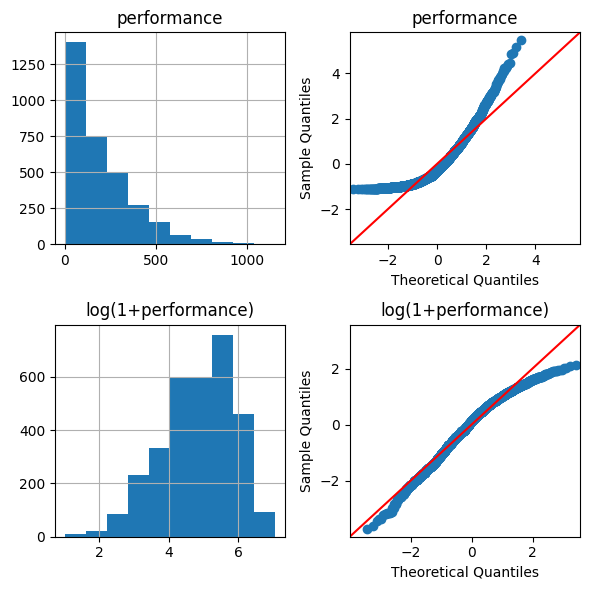

In [28]:
matplotlib.rcParams['figure.figsize'] = (6,6)
fig = plt.figure()

performance = df_total['performance']
log_performance = np.log1p(performance)
# histogram of performance 
ax = fig.add_subplot(2, 2, 1)
performance.hist(ax=ax)
plt.title("performance")

# qq-plot of performance
ax = fig.add_subplot(2, 2, 2)
sm.qqplot((performance-performance.mean())/performance.std(),line='45',ax=ax)
plt.title("performance")

# histogram of log transformed performance
ax = fig.add_subplot(2, 2, 3)
log_performance.hist(ax=ax)
plt.title("log(1+performance)")

# qqplot of log transformed performance
ax = fig.add_subplot(2, 2, 4)
sm.qqplot((log_performance-log_performance.mean())/log_performance.std(),line='45',ax=ax)
plt.title("log(1+performance)")
plt.tight_layout()


In [30]:
# Choose numeric features
num_feature = df_total.select_dtypes(include="number").dtypes.index.values

# Compute the sknewness, log transform features with abs(skewness)>0.75
skewed_feats = df_total[num_feature].apply(lambda x:x.skew())
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
skewed_feats = skewed_feats.index
# Helper function transforming features containing negative values 
# to features only containing nonnegative values
def moveToNonNegative(series):
  if series.min()<0:
    series = series-series.min()
  return series 

df_total[skewed_feats] = df_total[skewed_feats].apply(moveToNonNegative)
df_total[skewed_feats] = np.log1p(df_total[skewed_feats])

In [31]:
X = df_total.drop(featureToDrop+['performance'],axis=1)
y = df_total.performance
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 10,100],scoring='r2').fit(X, y)
print("r2 score:{:.3f}".format(clf.score(X,y)))

r2 score:0.317


Our r2 score just jump to from 0.253 to 0.317. I will stop here and check what the coefficients suggests.

<a id="q2-result"></a>
# 2.4.2 Result Evaluation of Q2


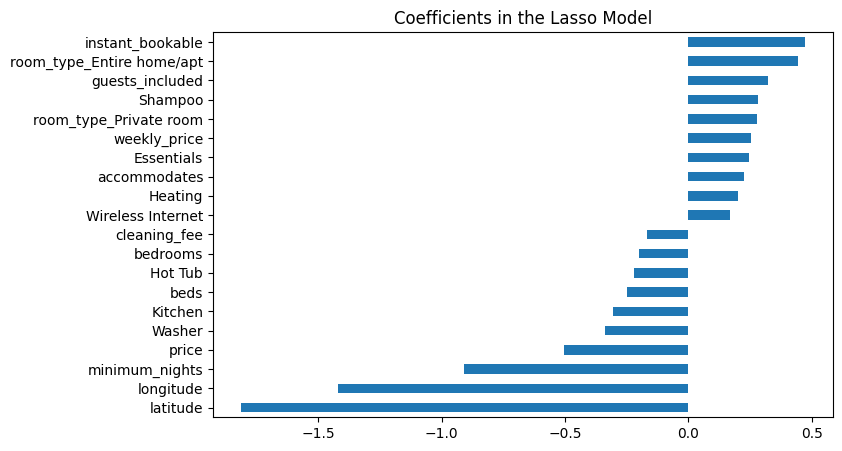

In [32]:
coef = pd.Series(clf.coef_, index = X.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

We can gain valuable insights by analyzing the coefficients of the features with the largest absolute value. For instance, amenities such as _Shampoo_ and _Essentials_ have a positive impact on the performance of an Airbnb unit. However, properties with a _Hot Tub_ may have a negative effect. Furthermore, it is uncommon to find a property with a pool in downtown Seattle, and these properties are likely to be located in rural areas, far from the city's major attractions.

I have not personally visited Seattle, but it is interesting to note that the _longitude_ and _latitude_ coefficients are the smallest negative values. This suggests that the northeastern part of Seattle may not be the best area to search for properties. To confirm this finding, I looked up the crime rate distribution in Seattle (the figure below), and the results support this observation.

Therefore, for Q2, it is recommended to avoid searching for properties in the northeastern part of Seattle and prioritize properties in the downtown area, which typically offer luxurious amenities such as Heating and Wireless Internet. It is also advisable to rent out the property as an entire apartment or private rooms rather than a shared room.

![](https://images.crimegrade.org/map/crime-rate-maps/safest-places-in-seattle-wa-metro.webp)


<a id="q3"></a>
# 2.5 Q3. How has Airbnb developed in Seattle, and are there any observable trends or patterns?
       
In this section, I will explore the reviews data, which contains reviews and dates from 2010 to 2015. I will analyze the number of reviews as a metric to reflect the growth of Airbnb in Seattle over time. Additionally, I can use this data to identify any seasonal trends in the demand for Airbnb rentals in the city.

<a id="q3-prepare"></a>
# 2.5.1 Time Series Data Wrangling and Visualization

In [35]:
# Extract year and month from date feature
df_reviews.date= pd.to_datetime(df_reviews.date)
df_reviews['year'] = df_reviews.date.dt.year
df_reviews['month'] = df_reviews.date.dt.month
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8


In [36]:
review_count = df_reviews.groupby(['year','month'])['comments'].size().reset_index()
# We drop 2009 and 2016 here as they don't contains data for full 12 months
review_count = review_count.loc[(review_count.year<2016) & (review_count.year>2009),:]
# I use log transform here to better observe the seasonal trend between different years
review_count_log = review_count.copy()
review_count_log.comments = np.log(review_count_log.comments)

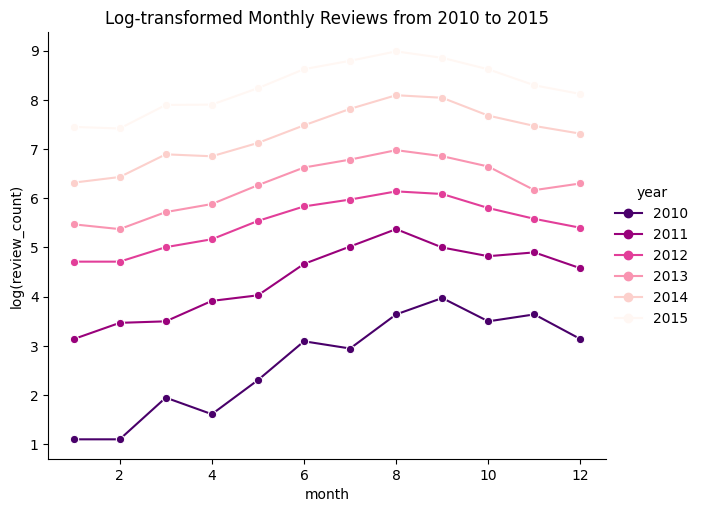

In [37]:
sns.relplot(data=review_count_log,x='month',hue='year',y='comments',marker='o',kind='line',palette="RdPu_r",aspect=10/8)
ax = plt.gca()
ax.set_ylabel("log(review_count)")
ax.set_title("Log-transformed Monthly Reviews from 2010 to 2015")
plt.show()

Based on the above graph, it is apparent that there is a seasonal trend in Airbnb demand in Seattle. August and September appear to be the peak months for travelers to visit the city, while demand decreases during the colder months of January and February.Additionally, the number of Airbnb reviews has been steadily increasing each year.
To gain further insight into this growth, it's time to examine how the year-over-year growth rate has evolved over the years.

In [38]:
review_count_pivot = review_count.pivot(index='month',columns='year',values='comments').T

# YoY growth rate per month
review_YoY_perMonth = review_count_pivot.diff()/review_count_pivot.shift()
review_YoY_perMonth = review_YoY_perMonth.dropna()
review_YoY_perMonth = review_YoY_perMonth.stack().reset_index().rename(columns={0:'comments'})

# YoY growh rate per year
review_YoY_perYear = review_count_pivot.sum(axis=1).diff() / review_count_pivot.sum(axis=1).shift()
review_YoY_perYear = review_YoY_perYear.dropna()
review_YoY_perYear = review_YoY_perYear.reset_index().rename(columns={0:'comments'})

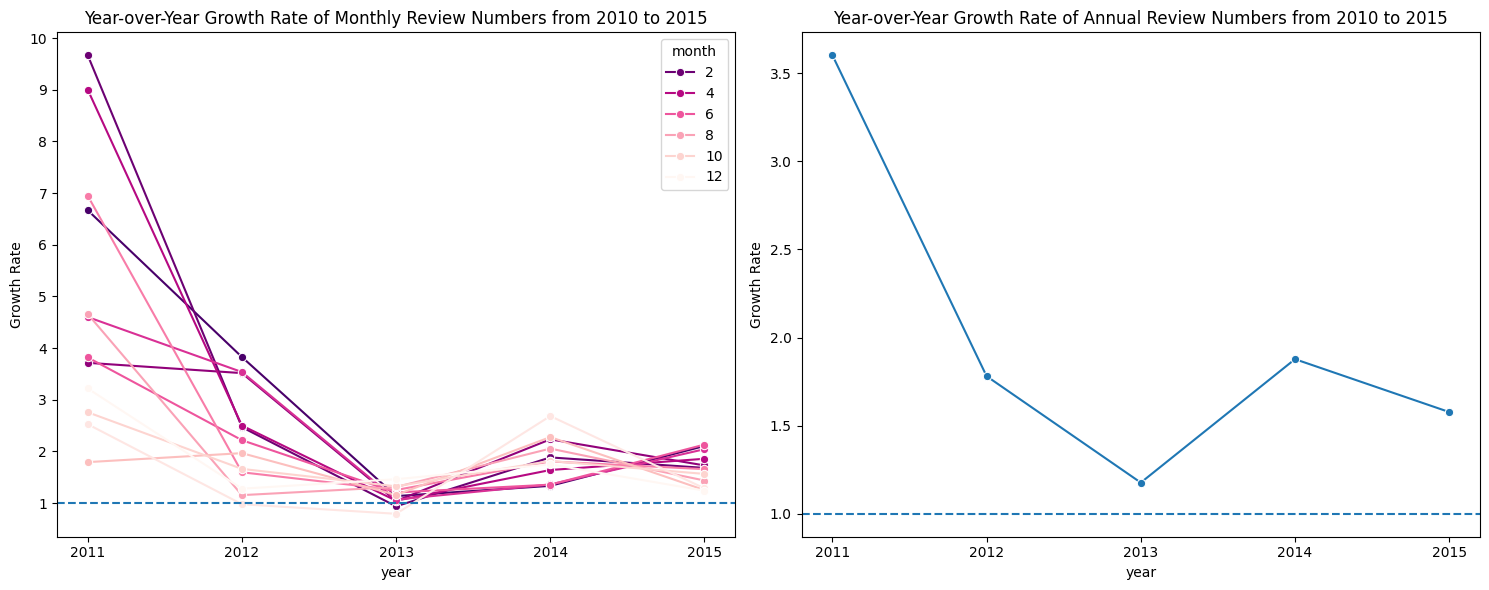

In [39]:
f, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(data=review_YoY_perMonth,x='year',hue='month',y='comments',marker='o',palette="RdPu_r",ax=axs[0])
ax = axs[0]
ax.axhline(1, ls='--')
ax.set_xticks([2011,2012,2013,2014,2015])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_ylabel("Growth Rate")
ax.set_title("Year-over-Year Growth Rate of Monthly Review Numbers from 2010 to 2015")
sns.lineplot(data=review_YoY_perYear,x='year',y='comments',marker='o',palette="RdPu_r",ax=axs[1])
ax = axs[1]
ax.axhline(1, ls='--')
ax.set_xticks([2011,2012,2013,2014,2015])
ax.set_ylabel("Growth Rate")
ax.set_title("Year-over-Year Growth Rate of Annual Review Numbers from 2010 to 2015")
f.tight_layout()

<a id="q3-result"></a>
# 2.5.2 Result Evaluation of Q3

Based on the left graph, we can see that from 2011 to 2013, the year-over-year growth rate of monthly reviews for the months in the first half of the year was larger than that for the months in the second half of the year. However, this trend reversed after 2013.

The right graph provides a clearer view of the overall trend. While the year-over-year growth rate remained above 1.0 throughout the years, there was a major drop in 2012 and 2013. Such fluctuations in year-over-year growth rates are not uncommon in business markets, as they can be unstable and misleading in the early years of development. For instance, in 2010, Airbnb had less than 300 reviews, which could lead to an exaggerated year-over-year growth rate in 2011.

In summary, for Q3, we observe an obvious seasonal pattern of Airbnb popularity in Seattle, with August and September being the busiest months for Seattle Airbnb hosts. The development of Airbnb in Seattle has been promising over the years. However, we should carefully interpret the YoY growth rate in 2011 and not let ourselves fall into the trap of having misconceptions about Airbnb being in a developmental setback.


<a id="conclusions"></a>
# 3. Conclusions

- As a traveler, it is advisable to prioritize booking with a Superhost, as they have a proven track record of providing exceptional hospitality and meeting guests' expectations, without overcharging
- As an investor, it is recommended to avoid seeking properties in the northeastern area of Seattle. Additionally, it is advisable to rent out the property as an entire apartment or private rooms rather than a shared room.
- Airbnb is steadily growing in Seattle throught out all these years.  It seems like the growth rate became relatively stable and reach a plateu after 2013
- The period of transition between summer and fall, typically occurring in late August and September, is widely considered the best time to visit Seattle due to its mild weather, pleasant outdoor activities, and seasonal events. On the other hand, the winter season in Seattle should generally be avoided due to the colder weather.